In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
df_fashion = pd.read_csv('./data/naver_shopping_fashion.csv', index_col=0)
df_digital = pd.read_csv('./data/naver_shopping_digital.csv', index_col=0)

In [4]:
df = pd.concat([df_fashion, df_digital], ignore_index=True)


df.to_csv('./data/naver_shopping.csv')

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head(5)

,title,image,lprice,link,category1,category2,category3,category4
0,링케 갤럭시 S24 울트라 퓨전 투명 케이스,https://shopping-phinf.pstatic.net/main_452616...,12300,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,휴대폰액세서리,휴대폰케이스,기타케이스
1,씨씨콜렉트 핸드메이드 싱글 벨티드 코트 C224MSG554,https://shopping-phinf.pstatic.net/main_441222...,149700,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,코트,NaN
2,제닉스 STORMX TITAN IN-EAR,https://shopping-phinf.pstatic.net/main_109983...,22400,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,음향가전,이어폰,NaN
3,앱코 AN02 RGB BAR 축교환 기계식 키보드,https://shopping-phinf.pstatic.net/main_278585...,42890,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,주변기기,키보드,유선키보드
4,프로젝트엠 프로젝트M 여성 PRJCT 라운드넥 크롭 플리스 맨투맨 EYD4TR2877BL,https://shopping-phinf.pstatic.net/main_447330...,15000,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,티셔츠,NaN


In [7]:
df.describe()

,lprice
count,2.000000e+03
mean,1.673764e+05
std,3.331754e+05
min,1.700000e+02
25%,2.240000e+04
50%,5.900000e+04
75%,1.462332e+05
max,3.190000e+06


In [8]:
df = df.drop(columns=['image', 'link', 'category3', 'category4'], errors='ignore')
df.head()

,title,lprice,category1,category2
0,링케 갤럭시 S24 울트라 퓨전 투명 케이스,12300,디지털/가전,휴대폰액세서리
1,씨씨콜렉트 핸드메이드 싱글 벨티드 코트 C224MSG554,149700,패션의류,여성의류
2,제닉스 STORMX TITAN IN-EAR,22400,디지털/가전,음향가전
3,앱코 AN02 RGB BAR 축교환 기계식 키보드,42890,디지털/가전,주변기기
4,프로젝트엠 프로젝트M 여성 PRJCT 라운드넥 크롭 플리스 맨투맨 EYD4TR2877BL,15000,패션의류,여성의류


패션의류 카테고리가 아닌 것이 있는지 검증

In [9]:
len(df[df['category1'] != '패션의류'])

1000

카테고리2 별로 가격 평균값 비교

In [10]:
import matplotlib.font_manager as fm

In [11]:
# for key in plt.rcParamsDefault.keys():
#     if 'font' in key:
#         print("{}: {}".format(key, plt.rcParamsDefault[key]))

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

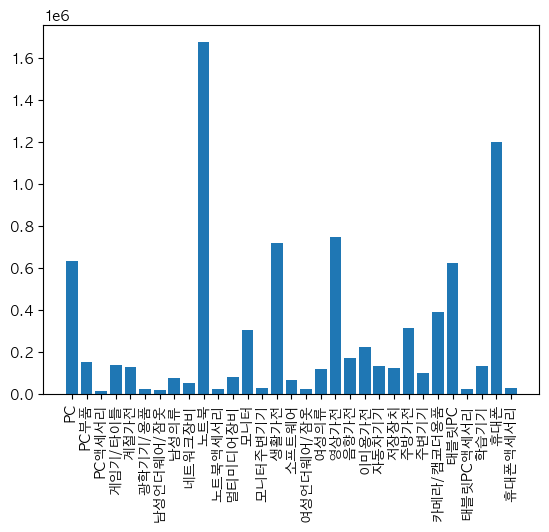

In [12]:
groupby_ = df.groupby('category2')['lprice'].mean()
plt.bar(groupby_.keys(), groupby_.tolist())
plt.xticks(rotation=90)
plt.show()

카테고리2 별로 아이템 수 비교

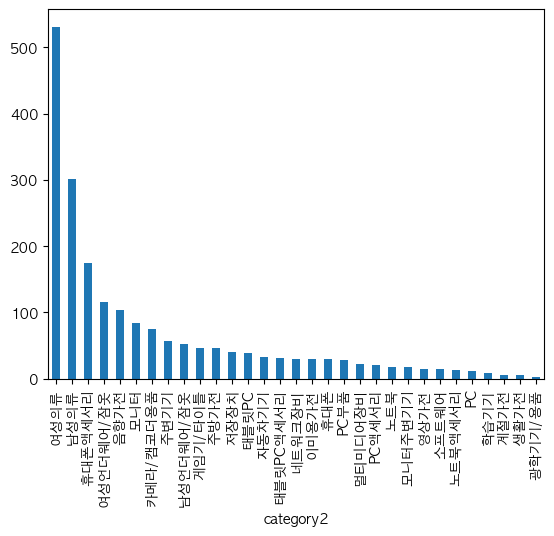

In [13]:
category2_values = df['category2'].value_counts().sort_values(ascending=False).index.tolist()
df['category2'].value_counts().sort_values(ascending=False).plot(
    kind="bar",
    xticks=range(len(category2_values)),
    rot=90
)
plt.xticks(range(len(category2_values)), category2_values);
plt.show();

name : SenetencePiece || CountVectorizer || TF-IDF <br>
category : OneHotEncoder 로 featrue engineering

In [14]:
df

,title,lprice,category1,category2
0,링케 갤럭시 S24 울트라 퓨전 투명 케이스,12300,디지털/가전,휴대폰액세서리
1,씨씨콜렉트 핸드메이드 싱글 벨티드 코트 C224MSG554,149700,패션의류,여성의류
2,제닉스 STORMX TITAN IN-EAR,22400,디지털/가전,음향가전
3,앱코 AN02 RGB BAR 축교환 기계식 키보드,42890,디지털/가전,주변기기
4,프로젝트엠 프로젝트M 여성 PRJCT 라운드넥 크롭 플리스 맨투맨 EYD4TR2877BL,15000,패션의류,여성의류
...,...,...,...,...
1995,로엠 트위드 칼라리스 자켓 RMJKD49R51,90300,패션의류,여성의류
1996,국산 PX 정품 로카티 코리아아미 ROKA 블랙 카키 디지털 화이트 반팔 긴팔 컴뱃티셔츠,9900,패션의류,남성의류
1997,로지텍 로지텍G G102 2세대 LIGHTSYNC,21390,디지털/가전,주변기기
1998,1만원인하 더엣지 23FW 하트넥 니트 뷔스티에 2종,43920,패션의류,여성의류


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./data/naver_shopping.csv')

In [8]:
with open('./data/title.txt', 'w', encoding='utf-8') as f:
    for col in ['title', 'category1', 'category2']:
        for line in df[col].values:
            try:
                f.write(line+'\n')
                print('s')
            except TypeError as e:
                print(line, e)

s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s


In [9]:
with open('./data/title.txt', 'r', encoding='utf-8') as f:
    titles =f.read().split('\n')
print(titles[0])

탑텐 TOPTEN 공용 플란넬 라운지웨어 SET-UP MSC4UI3001


# Category

## One Hot
단어간의 유사도 표현 못함 -> 폐기

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
class oneHotEncoder():
    def __init__(self):
        self.encoder = OneHotEncoder(sparse=False)
        
    def fit_transform(self, data: list):
        return self.encoder.fit_transform(data)
        
    def forward(self, df: pd.DataFrame):
        category2_encoded = self.encoder.fit_transform(df[["category2"]])
        df = pd.concat([df, 
                        pd.DataFrame(category2_encoded, columns=["OneHot_Category2_"+ str(self.encoder.categories_[0][i]) 
                                                     for i in range (len(self.encoder.categories_[0]))])], axis =1)
        return df

In [19]:
ohEncoder = oneHotEncoder()

df_ = ohEncoder.forward(df)
df_

,title,lprice,category1,category2,OneHot_Category2_PC,OneHot_Category2_PC부품,OneHot_Category2_PC액세서리,OneHot_Category2_게임기/타이틀,OneHot_Category2_계절가전,OneHot_Category2_광학기기/용품,...,OneHot_Category2_자동차기기,OneHot_Category2_저장장치,OneHot_Category2_주방가전,OneHot_Category2_주변기기,OneHot_Category2_카메라/캠코더용품,OneHot_Category2_태블릿PC,OneHot_Category2_태블릿PC액세서리,OneHot_Category2_학습기기,OneHot_Category2_휴대폰,OneHot_Category2_휴대폰액세서리
0,링케 갤럭시 S24 울트라 퓨전 투명 케이스,12300,디지털/가전,휴대폰액세서리,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,씨씨콜렉트 핸드메이드 싱글 벨티드 코트 C224MSG554,149700,패션의류,여성의류,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,제닉스 STORMX TITAN IN-EAR,22400,디지털/가전,음향가전,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,앱코 AN02 RGB BAR 축교환 기계식 키보드,42890,디지털/가전,주변기기,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,프로젝트엠 프로젝트M 여성 PRJCT 라운드넥 크롭 플리스 맨투맨 EYD4TR2877BL,15000,패션의류,여성의류,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,로엠 트위드 칼라리스 자켓 RMJKD49R51,90300,패션의류,여성의류,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,국산 PX 정품 로카티 코리아아미 ROKA 블랙 카키 디지털 화이트 반팔 긴팔 컴뱃티셔츠,9900,패션의류,남성의류,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,로지텍 로지텍G G102 2세대 LIGHTSYNC,21390,디지털/가전,주변기기,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,1만원인하 더엣지 23FW 하트넥 니트 뷔스티에 2종,43920,패션의류,여성의류,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Name

## 전처리 - Tokenizer
<uo> 
    <li> SentencePieceTokenizer </li>
    <li> BertWordPieceTokenizer </li>
</uo>

In [10]:
import os
from tokenizers import Tokenizer, SentencePieceBPETokenizer, BertWordPieceTokenizer
from transformers import BertTokenizer

In [21]:
class sentencePieceTokenizer():
    def __init__(self, DIR: str):
        try:
            self.tokenizer = Tokenizer.from_file(DIR + 'SentencePieceBPETokenizer/' + 'tokenizer.json')
        except:
            self.tokenizer = SentencePieceBPETokenizer()
    
    def train(self, file: str):
        self.tokenizer.train(file, vocab_size=25000)
        
    def forward(self, data: str) -> list:
        return self.tokenizer.encode(data)
    
    def save_model(self, DIR: str) -> None:
        PATH = DIR + 'SentencePieceBPETokenizer/'
        if not os.path.exists(PATH):
            os.makedirs(PATH)
        self.tokenizer.save(PATH+'tokenizer.json')

### Default

In [22]:
sentence_file = './data/title.txt'
DIR = './model/'

### SentencePiece Tokenizer

In [23]:
spTokenizer = sentencePieceTokenizer(DIR)

In [24]:
if not os.path.exists(DIR + 'SentencePieceBPETokenizer/' + 'tokenizer.json'):
    spTokenizer.train(sentence_file)
    spTokenizer.save_model(DIR)

In [25]:
for t in df.title.values[:10]:
    print(spTokenizer.forward(t).tokens)

['▁', '링', '케', '▁', '<unk>', '<unk>', '시', '▁S', '24', '▁울', '트', '라', '▁퓨', '전', '▁투', '명', '▁케이', '스']
['▁씨씨콜렉트', '▁핸드메이드', '▁싱글', '▁벨티드', '▁코트', '▁C', '224MSG', '5', '54']
['▁제', '닉', '스', '▁ST', 'OR', 'M', 'X', '▁T', 'IT', 'AN', '▁IN', '-', 'E', 'AR']
['▁', '<unk>', '코', '▁A', 'N', '02', '▁R', 'G', 'B', '▁B', 'AR', '▁', '<unk>', '<unk>', '<unk>', '▁기', '계', '식', '▁키', '보', '드']
['▁프로젝트엠', '▁프로젝트M', '▁여성', '▁PRJCT', '▁라운드넥', '▁크롭', '▁플리스', '▁맨투맨', '▁EYD4TR', '28', '77', 'BL']
['▁게스', '▁여성', '▁F', 'e', 'at', 'h', 'er', 'l', 'ig', 'h', 't', '▁G', 'l', 'am', '▁후드', '▁롱', '▁구스', '▁YN4W587', '3']
['▁노와이어브라', '▁편한', '▁모달', '▁브라탑', '▁수면', '▁브라']
['▁지오다노', '▁GIORDANO', '▁브러시드', '▁테리', '▁풀오버', '▁맨투맨', '▁02', '29', '30']
['▁내셔널지오그래픽', '▁헤론', '▁U넥', '▁경량', '▁다운', '▁점퍼', '▁N', '224', 'MD', 'W', '9', '20']
['▁모르간', '▁99', '9', '00원', '▁MORGAN', '▁윈터', '▁울', '▁재킷', '▁23', '71', '6', '4']


In [26]:
df['title_sentencePiece'] = df['title'].apply(lambda x : spTokenizer.forward(x).tokens).apply(lambda x : " ".join(x))

In [27]:
df

,title,lprice,category1,category2,title_sentencePiece
0,링케 갤럭시 S24 울트라 퓨전 투명 케이스,12300,디지털/가전,휴대폰액세서리,▁ 링 케 ▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁퓨 전 ▁투 명 ▁...
1,씨씨콜렉트 핸드메이드 싱글 벨티드 코트 C224MSG554,149700,패션의류,여성의류,▁씨씨콜렉트 ▁핸드메이드 ▁싱글 ▁벨티드 ▁코트 ▁C 224MSG 5 54
2,제닉스 STORMX TITAN IN-EAR,22400,디지털/가전,음향가전,▁제 닉 스 ▁ST OR M X ▁T IT AN ▁IN - E AR
3,앱코 AN02 RGB BAR 축교환 기계식 키보드,42890,디지털/가전,주변기기,▁ <unk> 코 ▁A N 02 ▁R G B ▁B AR ▁ <unk> <unk> <...
4,프로젝트엠 프로젝트M 여성 PRJCT 라운드넥 크롭 플리스 맨투맨 EYD4TR2877BL,15000,패션의류,여성의류,▁프로젝트엠 ▁프로젝트M ▁여성 ▁PRJCT ▁라운드넥 ▁크롭 ▁플리스 ▁맨투맨 ▁...
...,...,...,...,...,...
1995,로엠 트위드 칼라리스 자켓 RMJKD49R51,90300,패션의류,여성의류,▁로엠 ▁트위드 ▁칼라리스 ▁자켓 ▁RMJKD49R 51
1996,국산 PX 정품 로카티 코리아아미 ROKA 블랙 카키 디지털 화이트 반팔 긴팔 컴뱃티셔츠,9900,패션의류,남성의류,▁국산 ▁P X ▁정품 ▁로 카 티 ▁코 리아 아 미 ▁RO KA ▁블랙 ▁카키 ▁...
1997,로지텍 로지텍G G102 2세대 LIGHTSYNC,21390,디지털/가전,주변기기,▁로 지 텍 ▁로 지 텍 G ▁G 1 02 ▁2 세 대 ▁L I G H TS Y N C
1998,1만원인하 더엣지 23FW 하트넥 니트 뷔스티에 2종,43920,패션의류,여성의류,▁1만원인하 ▁더엣지 ▁23FW ▁하 트넥 ▁니트 ▁ 뷔 스티 에 ▁2종


###  BertWordPieceTokenizer

In [28]:
class bertWordPieceTokenizer():
    def __init__(self):
        try:
            self.tokenizer = Tokenizer.from_file(DIR + 'bertWordPieceTokenizer/' + 'tokenizer.json')
        except:
            # lowercase : 대소문자를 구분 여부. True일 경우 구분하지 않음.
            # strip_accents : True일 경우 악센트 제거. ex) é → e, ô → o
            self.tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)
        
    def train(self, file: str) -> list:
        self.tokenizer.train(file, vocab_size=25000)
        
    def forward(self, data: str) -> list:
        return self.tokenizer.encode(data)
    
    def save_model(self, DIR: str) -> None:
        PATH = DIR + 'BertWordPieceTokenizer/'
        if not os.path.exists(PATH):
            os.makedirs(PATH)
        self.tokenizer.save(PATH+'tokenizer.json')

In [29]:
bwpTokenizer = bertWordPieceTokenizer()
if not os.path.exists(DIR + 'BertWordPieceTokenizer/' + 'tokenizer.json'):
    bwpTokenizer.train(sentence_file)
    bwpTokenizer.save_model(DIR)

In [30]:
for t in df.title.values[:10]:
    print(bwpTokenizer.forward(t).tokens)

['링케', '갤럭시', 'S24', '울트라', '퓨전', '투명', '케이스']
['씨씨콜렉트', '핸드메이드', '싱글', '벨티드', '코트', 'C', '##224MSG', '##55', '##4']
['제닉스', 'STORMX', 'TITAN', 'IN', '-', 'E', '##AR']
['앱코', 'A', '##N', '##02', 'RGB', 'BA', '##R', '축교환', '기계식', '키보드']
['프로젝트엠', '프로젝트M', '여성', 'PRJCT', '라운드넥', '크롭', '플리스', '맨투맨', 'EYD4TR', '##28', '##77', '##BL']
['게스', '여성', 'F', '##e', '##at', '##h', '##er', '##light', 'G', '##la', '##m', '후드', '롱', '구스', 'YN4W58', '##73']
['노와이어브라', '편한', '모달', '브라탑', '수면', '브라']
['지오다노', 'GIORDANO', '브러시드', '테리', '풀오버', '맨투맨', '0', '##229', '##30']
['내셔널지오그래픽', '헤론', 'U넥', '경량', '다운', '점퍼', 'N2', '##24', '##MD', '##W', '##920']
['모르간', '999', '##00원', 'MORGAN', '윈터', '울', '재킷', '23', '##71', '##6', '##4']


In [31]:
df['title_bertWP'] = df['title'].apply(lambda x : bwpTokenizer.forward(x).tokens).apply(lambda x : " ".join(x))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                2000 non-null   object
 1   lprice               2000 non-null   int64 
 2   category1            2000 non-null   object
 3   category2            2000 non-null   object
 4   title_sentencePiece  2000 non-null   object
 5   title_bertWP         2000 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB


## Vectorize
<uo><li>CountVectorizer</li>
    <li>TF-IDF</li>
</uo>

In [33]:
# df.to_csv('./data/preprocessed.csv')

array(['링케 갤럭시 S24 울트라 퓨전 투명 케이스', 12300, '디지털/가전', '휴대폰액세서리',
       '▁ 링 케 ▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁퓨 전 ▁투 명 ▁케이 스',
       '링케 갤럭시 S24 울트라 퓨전 투명 케이스'], dtype=object)

In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
df = pd.read_csv('./data/preprocessed.csv')
vectorizer = CountVectorizer(ngram_range=(1, 3))

# document_vec = vectorizer.fit(df['title']+' '+df['category1']+' '+df['category2'])

title_vec = vectorizer.fit_transform(df['title']).toarray()
title_sentencePiece_vec = vectorizer.fit_transform(df['title_sentencePiece']).toarray()
title_bertWP_vec = vectorizer.fit_transform(df['title_bertWP']).toarray()

category1_vec = vectorizer.fit_transform(df['category1']).toarray()
category2_vec = vectorizer.fit_transform(df['category2']).toarray()



print(title_vec.shape, type(title_vec))
print(title_sentencePiece_vec.shape)
print(title_bertWP_vec.shape)
print(category1_vec.shape)
print(category2_vec.shape)
    
combined_vectors = []

In [36]:
document_vec = vectorizer.fit_transform(df['title']+' '+df['category1']+' '+df['category2'])

title_vec = vectorizer.transform(df['title']).toarray()
title_sentencePiece_vec = vectorizer.transform(df['title_sentencePiece']).toarray()
title_bertWP_vec = vectorizer.transform(df['title_bertWP']).toarray()

category1_vec = vectorizer.transform(df['category1']).toarray()
category2_vec = vectorizer.transform(df['category2']).toarray()


print(document_vec.shape)
print(title_vec.shape, type(title_vec))
print(title_sentencePiece_vec.shape)
print(title_bertWP_vec.shape)
print(category1_vec.shape)
print(category2_vec.shape)
    
combined_vectors = []

(2000, 25509)
(2000, 25509) <class 'numpy.ndarray'>
(2000, 25509)
(2000, 25509)
(2000, 25509)
(2000, 25509)


In [37]:
cos_sim_cnt = cosine_similarity(document_vec, document_vec)
candidates_cnt = cos_sim_cnt.argsort()[:, ::-1][:, 1:11].tolist()

In [38]:
text_columns = ['title', 'category2', 'title_sentencePiece', 'title_bertWP']

cosine_dict_cnt = {}

for col in text_columns:
    cntVectorize = CountVectorizer(ngram_range=(1, 3))
    cnt_matrix = cntVectorize.fit_transform(df[col])
    cos_sim_cnt = cosine_similarity(cnt_matrix, cnt_matrix).argsort()[:,::-1][:, 1:11].tolist()

    cosine_dict_cnt[col] = cos_sim_cnt

In [56]:
i=np.random.randint(0, 1000)

In [57]:
df.loc[[i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
78,78,지컷 폭스퍼 후드 구스다운 퀼팅 코트 7252417006,101600,패션의류,여성의류,▁지컷 ▁폭스퍼 ▁후드 ▁구스다운 ▁퀼팅 ▁코트 ▁7252 41700 6,지컷 폭스퍼 후드 구스다운 퀼팅 코트 7252417 ##006


In [41]:
df.loc[candidates_cnt[i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
961,961,오닉스 북스 포크5S 6인치 이북리더기 전자책 2+32GB,126290,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁포 크 5 S ▁6 인 치 ▁이 <unk> 리 더 ...,오닉스 북스 포크5 ##S 6인치 이북리더기 전자책 2 + 32GB
779,779,오닉스 북스 리프2,299000,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁리 프 2,오닉스 북스 리 ##프 ##2
747,747,소니 ICD-TX660,177000,디지털/가전,학습기기,▁소 니 ▁I C D - T X 6 6 0,소니 I ##C ##D - TX ##660
76,76,BESTA BK-50,153350,디지털/가전,학습기기,▁B EST A ▁B K- 50,BE ##S ##TA BK - 50
1736,1736,이소닉 MQ-U310,46500,디지털/가전,학습기기,▁이 소 닉 ▁M Q - U 3 10,이 ##소닉 MQ - U ##310
1745,1745,말랑하니 아기신생아 백색소음기 꿀잠 수면교육,36900,디지털/가전,학습기기,▁ <unk> 랑 하 니 ▁아 기 신 생 아 ▁백 색 소 음 기 ▁ <unk> 잠 ...,말 ##랑 ##하 ##니 아 ##기 ##신 ##생 ##아 백 ##색 ##소음 ##기...
942,942,소형 초소형 장시간 휴대용 녹음기 E10(4GB),46900,디지털/가전,학습기기,▁소 형 ▁초 소 형 ▁장 시 간 ▁휴 대 용 ▁ <unk> 음 기 ▁E 10 ( ...,소형 초 ##소 ##형 장 ##시 ##간 휴대용 녹음기 E10 ( 4 ##GB )
674,674,필립스 볼펜녹음기 펜 녹음기 녹음펜 휴대용 녹음기 볼펜형,148000,디지털/가전,학습기기,▁ 필 립 스 ▁ 볼 펜 <unk> 음 기 ▁ 펜 ▁ <unk> 음 기 ▁ <unk...,필립스 볼펜 ##녹 ##음 ##기 펜 녹음기 녹음 ##펜 휴대용 녹음기 볼펜 ##형
1986,1986,아이엠듀 갤럭시S22울트라 카드 케이스,14300,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 S 22 울 트 라 ▁카 드 ▁케이 스,아이엠듀 갤럭시S22 ##울트라 카드 케이스
82,82,로랜텍 하드그립 갤럭시S24울트라 케이스,9400,디지털/가전,휴대폰액세서리,▁로 랜 텍 ▁하 드 그 립 ▁ <unk> <unk> 시 S 24 울 트 라 ▁케이 스,로랜텍 하드 ##그 ##립 갤럭시S24 ##울트라 케이스


In [42]:
df.loc[cosine_dict_cnt['title'][i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
961,961,오닉스 북스 포크5S 6인치 이북리더기 전자책 2+32GB,126290,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁포 크 5 S ▁6 인 치 ▁이 <unk> 리 더 ...,오닉스 북스 포크5 ##S 6인치 이북리더기 전자책 2 + 32GB
779,779,오닉스 북스 리프2,299000,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁리 프 2,오닉스 북스 리 ##프 ##2
1398,1398,아이엠듀 갤럭시 Z폴드5 케이스 힌지 보호 풀커버 케이스,22000,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 ▁Z 폴 드 5 ▁케이 스 ▁ <unk...,아이엠듀 갤럭시 Z폴 ##드5 케이스 힌지 보호 풀커버 케이스
1498,1498,삼성 정품 갤럭시 S24 울트라 케이스 스마트 뷰 월렛 케이스,34900,디지털/가전,휴대폰액세서리,▁삼 성 ▁정품 ▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁케이 스 ▁스...,삼성 정품 갤럭시 S24 울트라 케이스 스마트 뷰 월 ##렛 케이스
1330,1330,갤럭시 S24 울트라 케이스 변색없는 생폰느낌 슬림 풀커버 정품 케이스,11900,디지털/가전,휴대폰액세서리,▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁케이 스 ▁ <unk> 색 없...,갤럭시 S24 울트라 케이스 변색 ##없는 생 ##폰 ##느 ##낌 슬림 풀커버 정...
82,82,로랜텍 하드그립 갤럭시S24울트라 케이스,9400,디지털/가전,휴대폰액세서리,▁로 랜 텍 ▁하 드 그 립 ▁ <unk> <unk> 시 S 24 울 트 라 ▁케이 스,로랜텍 하드 ##그 ##립 갤럭시S24 ##울트라 케이스
1986,1986,아이엠듀 갤럭시S22울트라 카드 케이스,14300,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 S 22 울 트 라 ▁카 드 ▁케이 스,아이엠듀 갤럭시S22 ##울트라 카드 케이스
1846,1846,빅쏘 갤럭시S24 울트라 케이스 레빅터프플러스,13890,디지털/가전,휴대폰액세서리,▁빅 쏘 ▁ <unk> <unk> 시 S 24 ▁울 트 라 ▁케이 스 ▁레 빅 터 ...,빅쏘 갤럭시S24 울트라 케이스 레빅터프플러스
1923,1923,아이엠듀 갤럭시워치5프로 풀커버 하이브리드 케이스,9300,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 워 치 5 프 로 ▁풀 커 버 ▁하이 ...,아이엠듀 갤럭시워치5 ##프로 풀커버 하이브리드 케이스
1319,1319,아이엠듀 애플펜슬 펜촉 케이스 보호캡,5800,디지털/가전,태블릿PC액세서리,▁아 이 엠 듀 ▁ <unk> 플 펜 슬 ▁ 펜 <unk> ▁케이 스 ▁보 호 캡,아이엠듀 애플펜슬 펜 ##촉 케이스 보호 ##캡


In [43]:
df.loc[cosine_dict_cnt['title_sentencePiece'][i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
179,179,갤럭시 Z플립5 케이스 힌지 보호 마그네틱 풀커버,25900,디지털/가전,휴대폰액세서리,▁ <unk> <unk> 시 ▁Z 플 립 5 ▁케이 스 ▁ <unk> 지 ▁보 호 ...,갤럭시 Z플립5 케이스 힌지 보호 마그네틱 풀커버
248,248,핸드폰 갤럭시 카드수납 케이스 카드케이스 2장 갤럭시 S23 울트라,13900,디지털/가전,휴대폰액세서리,▁핸드 폰 ▁ <unk> <unk> 시 ▁카 드 수 <unk> ▁케이 스 ▁카 드 ...,핸드폰 갤럭시 카드수납 케이스 카드케이스 2장 갤럭시 S23 울트라
1319,1319,아이엠듀 애플펜슬 펜촉 케이스 보호캡,5800,디지털/가전,태블릿PC액세서리,▁아 이 엠 듀 ▁ <unk> 플 펜 슬 ▁ 펜 <unk> ▁케이 스 ▁보 호 캡,아이엠듀 애플펜슬 펜 ##촉 케이스 보호 ##캡
1171,1171,좀비베리어 갤럭시탭 S9FE S9 S8 S7 플러스/S7FE 저반사 종이질감 액정보호필름,9900,디지털/가전,태블릿PC액세서리,▁ <unk> 비 베 리 어 ▁ <unk> <unk> 시 탭 ▁S 9 F E ▁S ...,좀 ##비 ##베 ##리어 갤럭시탭 S9 ##FE S9 S8 S7 플러스 / S7 ...
1982,1982,삼성전자 갤럭시북4 울트라 NT960XGL-X72A,3189000,디지털/가전,노트북,▁삼 성 전 자 ▁ <unk> <unk> 시 <unk> 4 ▁울 트 라 ▁N T 9...,삼성전자 갤럭시북4 울트라 NT960X ##G ##L - X ##72 ##A
1944,1944,올리빙 모니터 받침대 원목 듀얼용 보조 1단,3900,디지털/가전,모니터주변기기,▁ 올 리 <unk> ▁모 니 터 ▁ <unk> <unk> 대 ▁원 목 ▁듀 얼 용...,올 ##리 ##빙 모니터 받침대 원목 듀얼용 보조 1 ##단
1214,1214,삼성전자 갤럭시 워치5 44mm 알루미늄,180900,디지털/가전,휴대폰액세서리,▁삼 성 전 자 ▁ <unk> <unk> 시 ▁워 치 5 ▁4 4 m m ▁알 루 ...,삼성전자 갤럭시 워치 ##5 44mm 알루미늄
961,961,오닉스 북스 포크5S 6인치 이북리더기 전자책 2+32GB,126290,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁포 크 5 S ▁6 인 치 ▁이 <unk> 리 더 ...,오닉스 북스 포크5 ##S 6인치 이북리더기 전자책 2 + 32GB
495,495,후지필름 인스탁스 즉석 미니 필름,10950,디지털/가전,카메라/캠코더용품,▁후 지 필 름 ▁인 스 <unk> 스 ▁ <unk> <unk> ▁미 니 ▁ 필 름,후지필름 인스탁스 즉석 미니 필름
1079,1079,아이엠듀 갤럭시 Z플립5 링 케이스 힌지보호 투명 크리스탈,12300,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 ▁Z 플 립 5 ▁ 링 ▁케이 스 ▁ ...,아이엠듀 갤럭시 Z플립5 링 케이스 힌지보호 투명 크리스탈


In [44]:
df.loc[cosine_dict_cnt['title_bertWP'][i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
961,961,오닉스 북스 포크5S 6인치 이북리더기 전자책 2+32GB,126290,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁포 크 5 S ▁6 인 치 ▁이 <unk> 리 더 ...,오닉스 북스 포크5 ##S 6인치 이북리더기 전자책 2 + 32GB
779,779,오닉스 북스 리프2,299000,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁리 프 2,오닉스 북스 리 ##프 ##2
1498,1498,삼성 정품 갤럭시 S24 울트라 케이스 스마트 뷰 월렛 케이스,34900,디지털/가전,휴대폰액세서리,▁삼 성 ▁정품 ▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁케이 스 ▁스...,삼성 정품 갤럭시 S24 울트라 케이스 스마트 뷰 월 ##렛 케이스
1398,1398,아이엠듀 갤럭시 Z폴드5 케이스 힌지 보호 풀커버 케이스,22000,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 ▁Z 폴 드 5 ▁케이 스 ▁ <unk...,아이엠듀 갤럭시 Z폴 ##드5 케이스 힌지 보호 풀커버 케이스
1330,1330,갤럭시 S24 울트라 케이스 변색없는 생폰느낌 슬림 풀커버 정품 케이스,11900,디지털/가전,휴대폰액세서리,▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁케이 스 ▁ <unk> 색 없...,갤럭시 S24 울트라 케이스 변색 ##없는 생 ##폰 ##느 ##낌 슬림 풀커버 정...
1319,1319,아이엠듀 애플펜슬 펜촉 케이스 보호캡,5800,디지털/가전,태블릿PC액세서리,▁아 이 엠 듀 ▁ <unk> 플 펜 슬 ▁ 펜 <unk> ▁케이 스 ▁보 호 캡,아이엠듀 애플펜슬 펜 ##촉 케이스 보호 ##캡
82,82,로랜텍 하드그립 갤럭시S24울트라 케이스,9400,디지털/가전,휴대폰액세서리,▁로 랜 텍 ▁하 드 그 립 ▁ <unk> <unk> 시 S 24 울 트 라 ▁케이 스,로랜텍 하드 ##그 ##립 갤럭시S24 ##울트라 케이스
138,138,미아크 에어팟 3세대 캐리어 케이스,18600,디지털/가전,음향가전,▁미 아 크 ▁에어 <unk> ▁3 세 대 ▁캐 리 어 ▁케이 스,미아크 에어팟 3세대 캐리어 케이스
1846,1846,빅쏘 갤럭시S24 울트라 케이스 레빅터프플러스,13890,디지털/가전,휴대폰액세서리,▁빅 쏘 ▁ <unk> <unk> 시 S 24 ▁울 트 라 ▁케이 스 ▁레 빅 터 ...,빅쏘 갤럭시S24 울트라 케이스 레빅터프플러스
1209,1209,케이스위스 시그니쳐 남녀공용 벤치 롱패딩,26640,패션의류,남성의류,▁케이 스 위 스 ▁시그니쳐 ▁남녀공용 ▁벤치 ▁롱패딩,케이스 ##위 ##스 시그니쳐 남녀공용 벤치 롱패딩


# TF-IDF

In [45]:
cosine_dict_tfidf = {}

for col in text_columns:
    tfIdf = TfidfVectorizer(min_df=1, ngram_range=(1,3))
    tfidf_matrix = tfIdf.fit_transform(df[col])
    cos_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix).argsort()[:,::-1][:, 1:11].tolist()
    
    cosine_dict_tfidf[col] = cos_sim_tfidf

In [46]:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,3))

In [62]:
document_vec_vanilla = vectorizer.fit_transform(df['title']+' '+df['category1']+' '+df['category2'])
document_vec_sp = vectorizer.fit_transform(df['title_sentencePiece']+' '+df['category1']+' '+df['category2'])
document_vec_bert = vectorizer.fit_transform(df['title_bertWP']+' '+df['category1']+' '+df['category2'])

title_vec = vectorizer.transform(df['title']).toarray()
title_sentencePiece_vec = vectorizer.transform(df['title_sentencePiece']).toarray()
title_bertWP_vec = vectorizer.transform(df['title_bertWP']).toarray()

category1_vec = vectorizer.transform(df['category1']).toarray()
category2_vec = vectorizer.transform(df['category2']).toarray()


print(title_vec.shape, type(title_vec))
print(title_sentencePiece_vec.shape)
print(title_bertWP_vec.shape)
print(category1_vec.shape)
print(category2_vec.shape)

(2000, 24654) <class 'numpy.ndarray'>
(2000, 24654)
(2000, 24654)
(2000, 24654)
(2000, 24654)


In [64]:
cos_sim_tfidf_vanilla = cosine_similarity(document_vec_vanilla, document_vec_vanilla)
candidates_tfidf_vanilla = cos_sim_tfidf_vanilla.argsort()[:, ::-1][:, 1:11].tolist()

cos_sim_tfidf_sp = cosine_similarity(document_vec_sp, document_vec_sp)
candidates_tfidf_sp = cos_sim_tfidf_sp.argsort()[:, ::-1][:, 1:11].tolist()

cos_sim_tfidf_bert = cosine_similarity(document_vec_bert, document_vec_bert)
candidates_tfidf_bert = cos_sim_tfidf_bert.argsort()[:, ::-1][:, 1:11].tolist()


In [75]:
i=np.random.randint(0, 1000)

In [76]:
df.loc[[i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
969,969,삼성전자 삼성 SL-C563FW 정품토너포함,318160,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 56 3 FW ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C563FW 정품토너포함


In [77]:
df.loc[candidates_tfidf_vanilla[i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
357,357,삼성전자 삼성 SL-C513W 정품토너포함,168060,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 5 13 W ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C513W 정품토너포함
498,498,삼성전자 삼성 SL-C563W 정품토너포함,277850,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 56 3W ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C563W 정품토너포함
1178,1178,삼성전자 삼성 SL-M2030 정품토너포함,84430,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - M 20 30 ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - M2030 정품토너포함
1741,1741,삼성전자 삼성 SL-M2077F 정품토너포함,168060,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - M 20 77 F ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - M20 ##77 ##F 정품토너포함
1778,1778,캐논 MF645cx 정품토너포함,504000,디지털/가전,주변기기,▁캐 논 ▁M F 6 45 c x ▁정품 토 너 포 <unk>,캐논 M ##F ##645 ##c ##x 정품토너포함
1516,1516,삼성전자 삼성 SL-J1680 정품잉크포함,55410,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - J 16 8 0 ▁정품 잉 크 포 <unk>,삼성전자 삼성 SL - J ##16 ##80 정품 ##잉크 ##포함
275,275,삼성전자 삼성 SL-T1670 정품 무한잉크,178900,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - T 16 7 0 ▁정품 ▁무 한 잉 크,삼성전자 삼성 SL - T1670 정품 무한잉크
1129,1129,삼성전자 삼성 SL-T1670W 정품 무한잉크,160020,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - T 16 7 0 W ▁정품 ▁무 한 잉 크,삼성전자 삼성 SL - T1670 ##W 정품 무한잉크
234,234,재생토너 삼성 SL-C513W SL-C563W C563FW 개조프린터용 CLT-K510S,11000,디지털/가전,주변기기,▁재 생 토 너 ▁삼 성 ▁S L -C 5 13 W ▁S L -C 56 3W ▁C ...,재생토너 삼성 SL - C513W SL - C563W C563FW 개조프린터용 CL...
1080,1080,삼성 재생 토너 CLT-K510S 완제품 SL-C563FW C563W C513W 프린터,16500,디지털/가전,주변기기,▁삼 성 ▁재 생 ▁토 너 ▁C L T - K 510 S ▁ <unk> 제 품 ▁S...,삼성 재생 토너 CLT - K510S 완제품 SL - C563FW C563W C51...


In [78]:
df.loc[candidates_tfidf_sp[i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
1516,1516,삼성전자 삼성 SL-J1680 정품잉크포함,55410,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - J 16 8 0 ▁정품 잉 크 포 <unk>,삼성전자 삼성 SL - J ##16 ##80 정품 ##잉크 ##포함
357,357,삼성전자 삼성 SL-C513W 정품토너포함,168060,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 5 13 W ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C513W 정품토너포함
1778,1778,캐논 MF645cx 정품토너포함,504000,디지털/가전,주변기기,▁캐 논 ▁M F 6 45 c x ▁정품 토 너 포 <unk>,캐논 M ##F ##645 ##c ##x 정품토너포함
498,498,삼성전자 삼성 SL-C563W 정품토너포함,277850,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 56 3W ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C563W 정품토너포함
1178,1178,삼성전자 삼성 SL-M2030 정품토너포함,84430,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - M 20 30 ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - M2030 정품토너포함
1741,1741,삼성전자 삼성 SL-M2077F 정품토너포함,168060,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - M 20 77 F ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - M20 ##77 ##F 정품토너포함
557,557,앱코 K570 레인보우 무빙LED 기계식 게이밍 키보드,35000,디지털/가전,주변기기,▁ <unk> 코 ▁K 5 7 0 ▁레 인 보 우 ▁무 <unk> L E D ▁기 ...,앱코 K5 ##70 레인 ##보 ##우 무 ##빙 ##LED 기계식 게이밍 키보드
573,573,로지텍 LIFT 무선 마우스,74850,디지털/가전,주변기기,▁로 지 텍 ▁L I F T ▁무 선 ▁마 우 스,로지텍 LI ##FT 무선 마우스
318,318,재생토너 삼성 SL-C565W SL-C565FW C515W 개조프린터용 CLT-K515S,11000,디지털/가전,주변기기,▁재 생 토 너 ▁삼 성 ▁S L -C 56 5 W ▁S L -C 56 5 FW ▁...,재생토너 삼성 SL - C56 ##5W SL - C56 ##5 ##FW C51 ##...
234,234,재생토너 삼성 SL-C513W SL-C563W C563FW 개조프린터용 CLT-K510S,11000,디지털/가전,주변기기,▁재 생 토 너 ▁삼 성 ▁S L -C 5 13 W ▁S L -C 56 3W ▁C ...,재생토너 삼성 SL - C513W SL - C563W C563FW 개조프린터용 CL...


In [72]:
df.loc[candidates_tfidf_bert[i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
535,535,버커루 23FW 파격초 1 1 기모셋업 4종 남성,44490,패션의류,남성의류,▁버커루 ▁23FW ▁파격초 ▁1 ▁1 ▁기모셋업 ▁4종 ▁남성,버커루 23FW 파격초 1 1 기모셋업 4종 남성
35,35,비버리힐즈폴로클럽 23FW 울블렌디드 케이블니트 3종 여성,72270,패션의류,여성의류,▁비버리힐즈폴로클럽 ▁23FW ▁울 블 렌디드 ▁케이블니트 ▁3종 ▁여성,비버리힐즈폴로클럽 23FW 울 ##블 ##렌 ##디드 케이블니트 3종 여성
1244,1244,블루핏 FIT 퀼팅 구스다운 여성,79200,패션의류,여성의류,▁블루핏 ▁FIT ▁퀼팅 ▁구스다운 ▁여성,블루핏 FIT 퀼팅 구스다운 여성
899,899,크레송 롱 퀼팅 후드 다운 점퍼 1종 여성,110660,패션의류,여성의류,▁크레송 ▁롱 ▁퀼팅 ▁후드 ▁다운 ▁점퍼 ▁1종 ▁여성,크레송 롱 퀼팅 후드 다운 점퍼 1종 여성
1769,1769,모르간 23FW MORGAN 뉴 윈터 라운드 니트 4종,15690,패션의류,여성의류,▁모르간 ▁23FW ▁MORGAN ▁뉴 ▁윈터 ▁라운드 ▁니트 ▁4종,모르간 23FW MORGAN 뉴 윈터 라운드 니트 4종
1616,1616,벤시몽 23FW 여성 누아주 롱패딩 점퍼,40420,패션의류,여성의류,▁벤 시 몽 ▁23FW ▁여성 ▁누 아 주 ▁롱패딩 ▁점퍼,벤 ##시 ##몽 23FW 여성 누 ##아 ##주 롱패딩 점퍼
349,349,Lecaf 르까프 23FW 남성 반집업 플리스 4종,25590,패션의류,남성의류,▁Lecaf ▁르까프 ▁23FW ▁남성 ▁반집업 ▁플리스 ▁4종,Lecaf 르까프 23FW 남성 반집업 플리스 4종
893,893,블루핏 NEW 케이블 하프넥 니트 4종,53130,패션의류,여성의류,▁블루핏 ▁NEW ▁케이블 ▁하프 넥 ▁니트 ▁4종,블루핏 NEW 케이블 하프 ##넥 니트 4종
1708,1708,푸마 스킨라이크 브라팬티 2종 라이트 여성,13010,패션의류,여성언더웨어/잠옷,▁푸마 ▁스킨 라이크 ▁브라팬티 ▁2종 ▁라이트 ▁여성,푸마 스킨 ##라이 ##크 브라팬티 2종 라이트 여성
677,677,지베르니 여성 롱 패딩,30110,패션의류,여성의류,▁지 베 르 니 ▁여성 ▁롱 ▁패딩,지 ##베 ##르 ##니 여성 롱 패딩


In [79]:
df.loc[cosine_dict_tfidf['title'][i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
357,357,삼성전자 삼성 SL-C513W 정품토너포함,168060,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 5 13 W ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C513W 정품토너포함
498,498,삼성전자 삼성 SL-C563W 정품토너포함,277850,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L -C 56 3W ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - C563W 정품토너포함
1178,1178,삼성전자 삼성 SL-M2030 정품토너포함,84430,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - M 20 30 ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - M2030 정품토너포함
1741,1741,삼성전자 삼성 SL-M2077F 정품토너포함,168060,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - M 20 77 F ▁정품 토 너 포 <unk>,삼성전자 삼성 SL - M20 ##77 ##F 정품토너포함
1516,1516,삼성전자 삼성 SL-J1680 정품잉크포함,55410,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - J 16 8 0 ▁정품 잉 크 포 <unk>,삼성전자 삼성 SL - J ##16 ##80 정품 ##잉크 ##포함
275,275,삼성전자 삼성 SL-T1670 정품 무한잉크,178900,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - T 16 7 0 ▁정품 ▁무 한 잉 크,삼성전자 삼성 SL - T1670 정품 무한잉크
1129,1129,삼성전자 삼성 SL-T1670W 정품 무한잉크,160020,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - T 16 7 0 W ▁정품 ▁무 한 잉 크,삼성전자 삼성 SL - T1670 ##W 정품 무한잉크
234,234,재생토너 삼성 SL-C513W SL-C563W C563FW 개조프린터용 CLT-K510S,11000,디지털/가전,주변기기,▁재 생 토 너 ▁삼 성 ▁S L -C 5 13 W ▁S L -C 56 3W ▁C ...,재생토너 삼성 SL - C513W SL - C563W C563FW 개조프린터용 CL...
1080,1080,삼성 재생 토너 CLT-K510S 완제품 SL-C563FW C563W C513W 프린터,16500,디지털/가전,주변기기,▁삼 성 ▁재 생 ▁토 너 ▁C L T - K 510 S ▁ <unk> 제 품 ▁S...,삼성 재생 토너 CLT - K510S 완제품 SL - C563FW C563W C51...
288,288,삼성전자 삼성 ZRS25LSLH,180000,디지털/가전,주방가전,▁삼 성 전 자 ▁삼 성 ▁ZR S 25 L SL H,삼성전자 삼성 ZR ##S ##25 ##L ##SL ##H


In [52]:
df.loc[cosine_dict_tfidf['title_sentencePiece'][i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
179,179,갤럭시 Z플립5 케이스 힌지 보호 마그네틱 풀커버,25900,디지털/가전,휴대폰액세서리,▁ <unk> <unk> 시 ▁Z 플 립 5 ▁케이 스 ▁ <unk> 지 ▁보 호 ...,갤럭시 Z플립5 케이스 힌지 보호 마그네틱 풀커버
1398,1398,아이엠듀 갤럭시 Z폴드5 케이스 힌지 보호 풀커버 케이스,22000,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 ▁Z 폴 드 5 ▁케이 스 ▁ <unk...,아이엠듀 갤럭시 Z폴 ##드5 케이스 힌지 보호 풀커버 케이스
1319,1319,아이엠듀 애플펜슬 펜촉 케이스 보호캡,5800,디지털/가전,태블릿PC액세서리,▁아 이 엠 듀 ▁ <unk> 플 펜 슬 ▁ 펜 <unk> ▁케이 스 ▁보 호 캡,아이엠듀 애플펜슬 펜 ##촉 케이스 보호 ##캡
248,248,핸드폰 갤럭시 카드수납 케이스 카드케이스 2장 갤럭시 S23 울트라,13900,디지털/가전,휴대폰액세서리,▁핸드 폰 ▁ <unk> <unk> 시 ▁카 드 수 <unk> ▁케이 스 ▁카 드 ...,핸드폰 갤럭시 카드수납 케이스 카드케이스 2장 갤럭시 S23 울트라
1079,1079,아이엠듀 갤럭시 Z플립5 링 케이스 힌지보호 투명 크리스탈,12300,디지털/가전,휴대폰액세서리,▁아 이 엠 듀 ▁ <unk> <unk> 시 ▁Z 플 립 5 ▁ 링 ▁케이 스 ▁ ...,아이엠듀 갤럭시 Z플립5 링 케이스 힌지보호 투명 크리스탈
1951,1951,아이엠듀 아이패드 9세대 8세대 7세대 10.2인치 애플펜슬 수납홀더 스마트커버 케이스,15400,디지털/가전,태블릿PC액세서리,▁아 이 엠 듀 ▁아 이 패 드 ▁9 세 대 ▁8 세 대 ▁7 세 대 ▁10 . 2...,아이엠듀 아이패드 9세대 8세대 7세대 10 . 2 ##인치 애플펜슬 수납홀더 스마...
961,961,오닉스 북스 포크5S 6인치 이북리더기 전자책 2+32GB,126290,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁포 크 5 S ▁6 인 치 ▁이 <unk> 리 더 ...,오닉스 북스 포크5 ##S 6인치 이북리더기 전자책 2 + 32GB
1944,1944,올리빙 모니터 받침대 원목 듀얼용 보조 1단,3900,디지털/가전,모니터주변기기,▁ 올 리 <unk> ▁모 니 터 ▁ <unk> <unk> 대 ▁원 목 ▁듀 얼 용...,올 ##리 ##빙 모니터 받침대 원목 듀얼용 보조 1 ##단
1214,1214,삼성전자 갤럭시 워치5 44mm 알루미늄,180900,디지털/가전,휴대폰액세서리,▁삼 성 전 자 ▁ <unk> <unk> 시 ▁워 치 5 ▁4 4 m m ▁알 루 ...,삼성전자 갤럭시 워치 ##5 44mm 알루미늄
1171,1171,좀비베리어 갤럭시탭 S9FE S9 S8 S7 플러스/S7FE 저반사 종이질감 액정보호필름,9900,디지털/가전,태블릿PC액세서리,▁ <unk> 비 베 리 어 ▁ <unk> <unk> 시 탭 ▁S 9 F E ▁S ...,좀 ##비 ##베 ##리어 갤럭시탭 S9 ##FE S9 S8 S7 플러스 / S7 ...


In [53]:
df.loc[cosine_dict_tfidf['title_bertWP'][i]]

,Unnamed: 0,title,lprice,category1,category2,title_sentencePiece,title_bertWP
961,961,오닉스 북스 포크5S 6인치 이북리더기 전자책 2+32GB,126290,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁포 크 5 S ▁6 인 치 ▁이 <unk> 리 더 ...,오닉스 북스 포크5 ##S 6인치 이북리더기 전자책 2 + 32GB
779,779,오닉스 북스 리프2,299000,디지털/가전,학습기기,▁오 닉 스 ▁ <unk> 스 ▁리 프 2,오닉스 북스 리 ##프 ##2
705,705,포유디지탈 아이뮤즈 뮤패드 GS10 WIFI 32GB,109000,디지털/가전,태블릿PC,▁포 유 디 지 탈 ▁아 이 뮤 즈 ▁ 뮤 패 드 ▁G S 10 ▁W I F I ▁...,포유디지탈 아이뮤즈 뮤 ##패드 G ##S ##10 WIFI 32GB
1311,1311,닌텐도 스포츠 레그스트랩 포함 패키지 (SWITCH),46050,디지털/가전,게임기/타이틀,▁ 닌 텐 도 ▁스포츠 ▁레 그 스트 랩 ▁포 <unk> ▁패 키지 ▁( SW I ...,닌텐도 스포츠 레 ##그 ##스트 ##랩 포함 패키지 ( SWITCH )
707,707,삼성전자 갤럭시탭 A7 Lite (SM-T220) WiFi 32GB,208790,디지털/가전,태블릿PC,▁삼 성 전 자 ▁ <unk> <unk> 시 탭 ▁A 7 ▁L i t e ▁( S ...,삼성전자 갤럭시탭 A7 Lite ( SM - T ##22 ##0 ) WiFi 32GB
1516,1516,삼성전자 삼성 SL-J1680 정품잉크포함,55410,디지털/가전,주변기기,▁삼 성 전 자 ▁삼 성 ▁S L - J 16 8 0 ▁정품 잉 크 포 <unk>,삼성전자 삼성 SL - J ##16 ##80 정품 ##잉크 ##포함
1322,1322,도시바 외장하드 저장장치 1TB 외장HDD 1테라 (정품 파우치포함),89900,디지털/가전,저장장치,▁도 시 바 ▁외 장 하 드 ▁ 저 장 장 치 ▁1 T B ▁외 장 HD D ▁1 ...,도 ##시 ##바 외장하드 저장장치 1TB 외장HDD 1테라 ( 정품 파우치 ##포함 )
1498,1498,삼성 정품 갤럭시 S24 울트라 케이스 스마트 뷰 월렛 케이스,34900,디지털/가전,휴대폰액세서리,▁삼 성 ▁정품 ▁ <unk> <unk> 시 ▁S 24 ▁울 트 라 ▁케이 스 ▁스...,삼성 정품 갤럭시 S24 울트라 케이스 스마트 뷰 월 ##렛 케이스
1147,1147,무선 카플레이 모니터 네비게이션 안드로이드오토 V10 올인원 1년As 64G포함,148000,디지털/가전,자동차기기,▁무 선 ▁카 플 레이 ▁모 니 터 ▁네 비 게 이 션 ▁안 드 로 이드 오 토 ▁...,무선 카플레이 모니터 네비 ##게 ##이션 안드로이드 ##오 ##토 V10 올인원 ...
1179,1179,씨게이트 외장하드 2TB 2테라 데이터복구 저장장치 (정품파우치 포함) N도착보장,125900,디지털/가전,저장장치,▁씨 게 이트 ▁외 장 하 드 ▁2 T B ▁2 테 라 ▁데 이 터 복 구 ▁ 저 ...,씨게이트 외장하드 2TB 2테라 데이터복구 저장장치 ( 정품 ##파 ##우치 포함 ...


# Data Split

In [ ]:
from sklearn.model_selection import train_test_split